In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('X_train shape:', x_train.shape)
print('Y_train shape:', y_train.shape)
print()
print('X_test shape:', x_test.shape)
print('Y_test shape:', y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [7]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    X_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    X_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
Y_train = keras.utils.to_categorical(y_train, num_classes) #inizialmente le label sono la cifra, lo voglio trasformare in vettore di bit di cui quello acceso è quello con indice la cifra (cioè quello che sarà output rete)
Y_test = keras.utils.to_categorical(y_test, num_classes)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #Dropout per limitare overfitting
from keras.layers import Flatten, Conv2D, AveragePooling2D


def create_model():
    #instantiate model
    model = Sequential()
    #Convolutional
    ##in: 28x28x1
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    ##out: 24x24x10, in:
    model.add(AveragePooling2D(pool_size=(2,2)))
    ##out: 12x12x10, in:
    model.add(Conv2D(16, kernel_size=(5,5),strides=2))
    ##out: 4x4x16, in:
    #Deep
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    return model

In [9]:
from keras.optimizers import SGD, RMSprop, Adam, Nadam, Adagrad, Adadelta, Adamax

def compile_model(opt_function):
    # create the model
    model=create_model()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt_function,
                  metrics=['acc'])
    return model

In [10]:
model_CNN=compile_model(SGD())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 10)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 16)          4016      
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [13]:
RERUN=False
epochs = 20

if(RERUN):
    batch_size = 32 
    history = model_CNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,
                            validation_data=(X_test, Y_test))
    import pandas as pd
    print("Storing model and history")
    path = "store/122-"
    path_history = path+"history.csv"
    path_model = path+"model.tf"
        
    model_DNN.save(filepath=path_model, include_optimizer=True)  
    df  = pd.DataFrame(history.history) 
    with open(path_history, mode='w') as file:
        df.to_csv(file)
    print()


Epoch 1/20
1875/1875 [==============================] - 59s 32ms/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/20
1875/1875 [==============================] - 60s 32ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 3/20
1875/1875 [==============================] - 62s 33ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/20
1875/1875 [==============================] - 60s 32ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/20
1875/1875 [==============================] - 59s 31ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/20
1875/1875 [==============================] - 60s 32ms/step - loss: 2.3013 - acc: 0.1123 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 7/20
1875/1875 [==============================] - 58s 31ms/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 8/20
1875/1875 [==========================

INFO:tensorflow:Assets written to: store/122-model.tf/assets


INFO:tensorflow:Assets written to: store/122-model.tf/assets


313/313 [==============================] - 5s 13ms/step - loss: 25.7019 - acc: 0.1094


Text(0.5, 1.0, 'Accuracy - test')

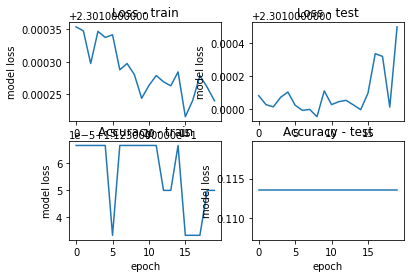

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

path = "store/122-"
model_DNN=load_model(path+"model.tf")
history = pd.read_csv(path+"history.csv")
    
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

plt.subplot(2, 2, 1)
plt.plot(range(0, epochs), history.loc[:,"loss"])
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Loss - train')

plt.subplot(2, 2, 2)
plt.plot(range(0, epochs), history.loc[:,"val_loss"])
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Loss - test')

plt.subplot(2, 2, 3)
plt.plot(range(0, epochs), history.loc[:,"acc"])
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Accuracy - train')

plt.subplot(2, 2, 4)
plt.plot(range(0, epochs), history.loc[:,"val_acc"])
plt.xlabel('epoch')
plt.ylabel('model loss')
plt.title('Accuracy - test')